In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_load = pd.read_csv("daily_load.csv", parse_dates = ["date"])
df_load_sul = df_load[df_load["id_reg"] == "S"].reset_index(drop = True) # filtro para a região sul
df_load_sul = df_load_sul[(df_load_sul.date >= "2006-04-01") & (df_load_sul.date <= "2022-05-31")]
df_load_sul.index = df_load_sul.date
df_weather = pd.read_csv("temp_sul_01012000_30062022.csv", parse_dates=["DATA_HORA"], 
                 usecols=["UF", "ESTACAO", "DATA_HORA", "PRECIPITAÇÃO_TOTAL_HORÁRIO", "PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA",  
                          "TEMPERATURA_DO_AR__BULBO_SECO_HORARIA", "TEMPERATURA_DO_PONTO_DE_ORVALHO", "UMIDADE_RELATIVA_DO_AR_HORARIA",
                          "VENTO_VELOCIDADE_HORARIA"])
df_weather["DATA"] = df_weather.DATA_HORA.dt.date
df_weather = df_weather[(df_weather.DATA_HORA >= "2006-04-01") & (df_weather.DATA_HORA < "2022-06-01")]

In [ ]:
plt.figure()
plot_acf(df_load_sul["load_mwmed"], title = "Autocorrelação da série em nível", lags = 15)
plt.ylim(-0.25, 1.1)
plt.xlabel("Defasagem")
plt.savefig("fac_load.jpeg")

In [3]:
df_weather.replace(-9999, np.nan, inplace=True)
df_weather_2 = df_weather.groupby(["DATA"], as_index=False).agg({
                                                            "PRECIPITAÇÃO_TOTAL_HORÁRIO": "sum",
                                                            "PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA": "mean",
                                                            "TEMPERATURA_DO_AR__BULBO_SECO_HORARIA": "mean",
                                                            "TEMPERATURA_DO_PONTO_DE_ORVALHO": "mean",
                                                            "UMIDADE_RELATIVA_DO_AR_HORARIA": "mean",
                                                            "VENTO_VELOCIDADE_HORARIA": "mean"
                                                            })
df_weather_2.head()

,DATA,PRECIPITAÇÃO_TOTAL_HORÁRIO,PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA,TEMPERATURA_DO_AR__BULBO_SECO_HORARIA,TEMPERATURA_DO_PONTO_DE_ORVALHO,UMIDADE_RELATIVA_DO_AR_HORARIA,VENTO_VELOCIDADE_HORARIA
0,2006-04-01,0.0,965.500000,18.600000,14.900000,79.200000,2.440000
1,2006-04-02,0.2,997.806870,22.139695,16.208397,71.106870,3.171756
2,2006-04-03,3.4,988.485714,21.018571,16.637143,76.728571,3.175714
3,2006-04-04,4.6,985.045223,22.883439,16.239490,68.254777,2.813376
4,2006-04-05,3.2,983.131737,22.411976,16.995808,72.862275,1.916766


In [4]:
df_weather_2["DATA"] = pd.to_datetime(df_weather_2.DATA)
df_weather_2.index = df_weather_2.DATA

<AxesSubplot:xlabel='date'>

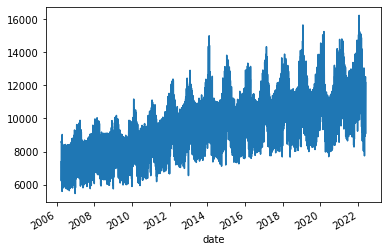

In [5]:
df_load_sul.load_mwmed.plot()

In [8]:
df_weather_2

,DATA,PRECIPITAÇÃO_TOTAL_HORÁRIO,PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA,TEMPERATURA_DO_AR__BULBO_SECO_HORARIA,TEMPERATURA_DO_PONTO_DE_ORVALHO,UMIDADE_RELATIVA_DO_AR_HORARIA,VENTO_VELOCIDADE_HORARIA
DATA,,,,,,,
2006-04-01,2006-04-01,0.0,965.500000,18.600000,14.900000,79.200000,2.440000
2006-04-02,2006-04-02,0.2,997.806870,22.139695,16.208397,71.106870,3.171756
2006-04-03,2006-04-03,3.4,988.485714,21.018571,16.637143,76.728571,3.175714
2006-04-04,2006-04-04,4.6,985.045223,22.883439,16.239490,68.254777,2.813376
2006-04-05,2006-04-05,3.2,983.131737,22.411976,16.995808,72.862275,1.916766
...,...,...,...,...,...,...,...
2022-05-27,2022-05-27,648.0,960.286914,16.569264,14.103584,86.214481,2.187956
2022-05-28,2022-05-28,346.0,958.651019,16.455227,14.629164,89.519316,1.904536
2022-05-29,2022-05-29,1767.8,954.791278,16.344895,14.537538,89.523089,2.473669


In [9]:
df_load_sul = df_load_sul["2008-01-01":]
df_weather_2 = df_weather_2["2008-01-01":]

<Figure size 1440x720 with 0 Axes>

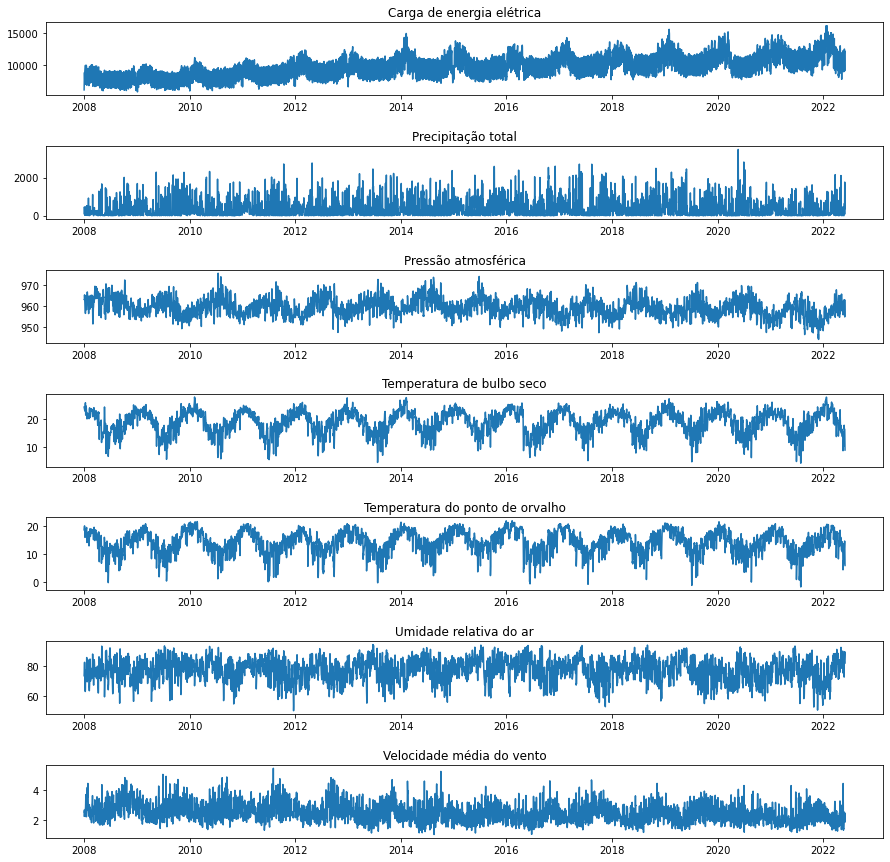

In [10]:
plt.figure(figsize = (20, 10))

fig, axs = plt.subplots(7)
fig.set_figheight(15)
fig.set_figwidth(15)

axs[0].plot(df_load_sul.load_mwmed)
axs[0].title.set_text('Carga de energia elétrica')
axs[1].plot(df_weather_2.PRECIPITAÇÃO_TOTAL_HORÁRIO)
axs[1].title.set_text('Precipitação total')
axs[2].plot(df_weather_2.PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA)
axs[2].title.set_text('Pressão atmosférica')
axs[3].plot(df_weather_2.TEMPERATURA_DO_AR__BULBO_SECO_HORARIA)
axs[3].title.set_text('Temperatura de bulbo seco')
axs[4].plot(df_weather_2.TEMPERATURA_DO_PONTO_DE_ORVALHO)
axs[4].title.set_text('Temperatura do ponto de orvalho')
axs[5].plot(df_weather_2.UMIDADE_RELATIVA_DO_AR_HORARIA)
axs[5].title.set_text('Umidade relativa do ar')
axs[6].plot(df_weather_2.VENTO_VELOCIDADE_HORARIA)
axs[6].title.set_text('Velocidade média do vento')

plt.subplots_adjust(hspace= 0.7)
plt.savefig("series_variaveis.jpeg")
